In [1]:
# Import libraries  
import numpy as np # for linear algebra  
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)  
import seaborn as sns # for data visualization  
import matplotlib.pyplot as plt # to plot data visualization charts  
from collections import Counter  
import os  
  
# Modeling Libraries  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC 

In [2]:
# Importing the dataset 
data = pd.read_csv("Diabetes_Data.csv")  
  
# First step is getting familiar with the structure of the dataset  
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2760 non-null   int64  
 1   Pregnancies               2760 non-null   int64  
 2   Glucose                   2760 non-null   int64  
 3   BloodPressure             2760 non-null   int64  
 4   SkinThickness             2760 non-null   int64  
 5   Insulin                   2760 non-null   int64  
 6   BMI                       2760 non-null   float64
 7   DiabetesPedigreeFunction  2760 non-null   float64
 8   Age                       2760 non-null   int64  
 9   Outcome                   2760 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 215.8 KB


In [3]:
# Showing the top 5 rows of the dataset  
data.head()  

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,81,1
1,2,1,85,66,29,0,26.6,0.351,67,0
2,3,8,183,64,0,0,23.3,0.672,74,1
3,4,1,89,66,23,94,28.1,0.167,70,0
4,5,0,137,40,35,168,43.1,2.288,64,1


In [4]:
# Exploring the missing values in the diabetes dataset  
data.isnull().sum()  

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Replacing 0 values with the mean of that column  
  
# Replacing 0 values of Glucose  
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())  
  
# Filling 0 values of Blood Pressure  
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())   
  
# Replacing 0 values in BMI  
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())  
  
# Replacing the missing values of Insulin and SkinThickness  
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  
data.head()  

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35.000000,80.153986,33.6,0.627,81,1
1,2,1,85,66,29.000000,80.153986,26.6,0.351,67,0
2,3,8,183,64,20.806884,80.153986,23.3,0.672,74,1
3,4,1,89,66,23.000000,94.000000,28.1,0.167,70,0
4,5,0,137,40,35.000000,168.000000,43.1,2.288,64,1


In [6]:
# Reviewing the dataset statistics  
data.describe() 

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000
mean,1380.500000,3.743841,121.909058,72.378986,26.830326,118.720831,32.576258,0.470989,72.479348,0.343841
std,796.887696,3.325405,30.477927,11.980587,9.811081,89.777375,7.079500,0.326003,8.801315,0.475075
min,1.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,60.000000,0.000000
25%,690.750000,1.000000,99.000000,64.000000,20.806884,80.153986,27.500000,0.244000,64.000000,0.000000
50%,1380.500000,3.000000,117.000000,72.000000,23.000000,80.153986,32.200000,0.374500,70.000000,0.000000
75%,2070.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,81.000000,1.000000
max,2760.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,90.000000,1.000000


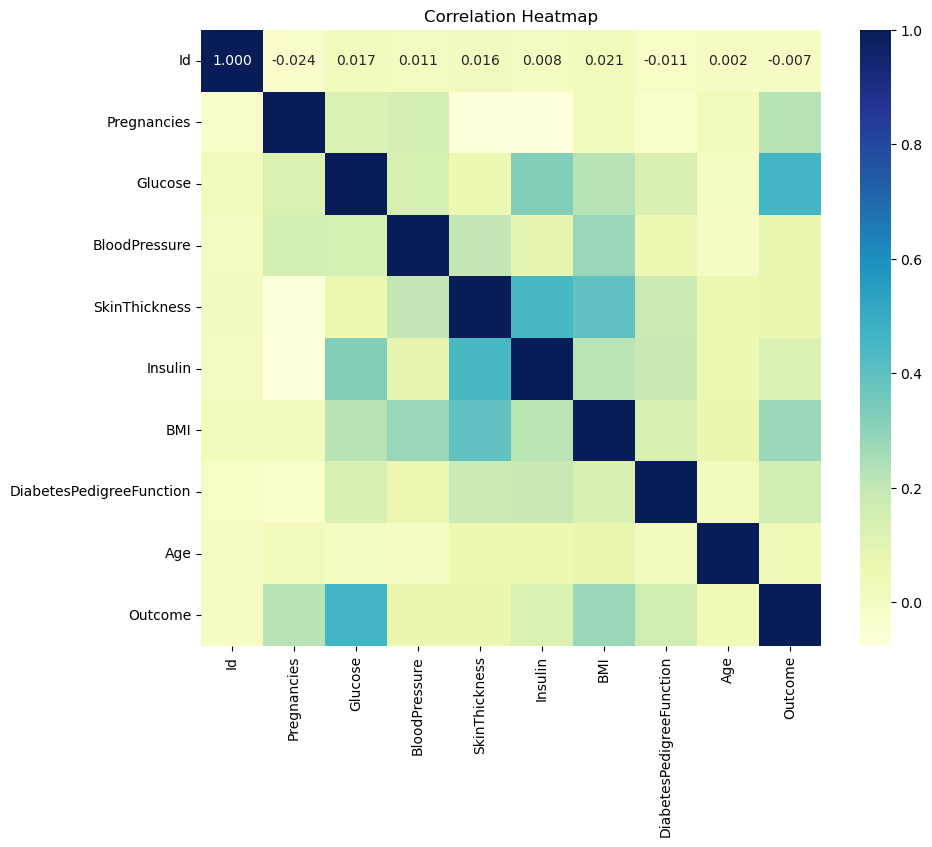

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Diabetes_Data.csv')  # Replace with the path to your dataset

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


In [3]:
# Check for NaN values in the dataset
print(data.isna().sum())

# Drop rows with NaN values if necessary
data = data.dropna()

# Recompute the correlation matrix
correlation_matrix = data.corr()


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


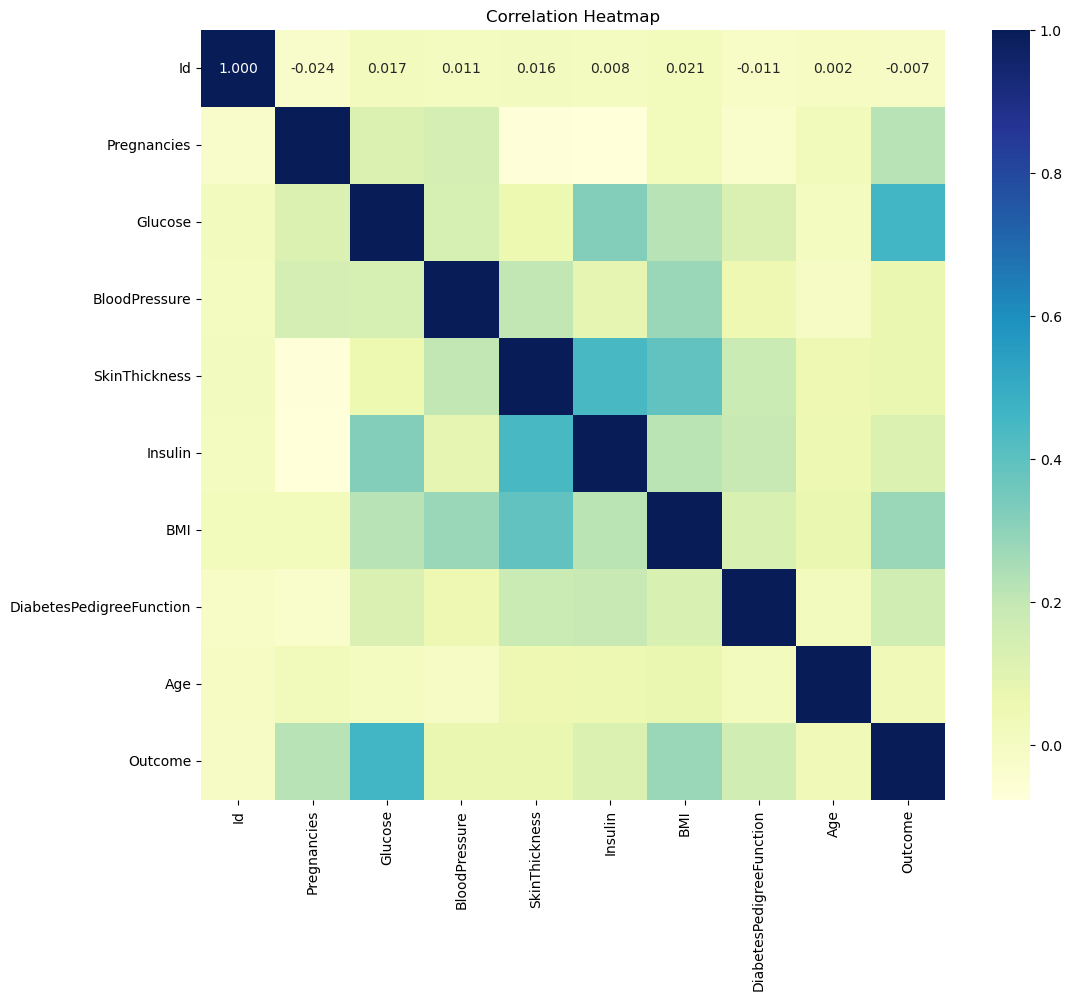

In [4]:
plt.figure(figsize=(12, 10))  # Increase the figure size if necessary
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

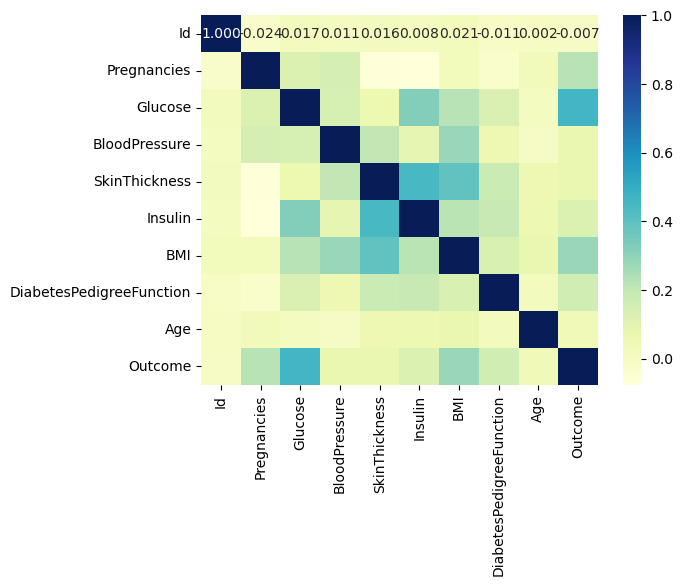

In [5]:
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)


   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   81        1  
1                     0.351   67        0  
2                     0.672   74        1  
3                     0.167   70        0  
4                     2.288   64        1  


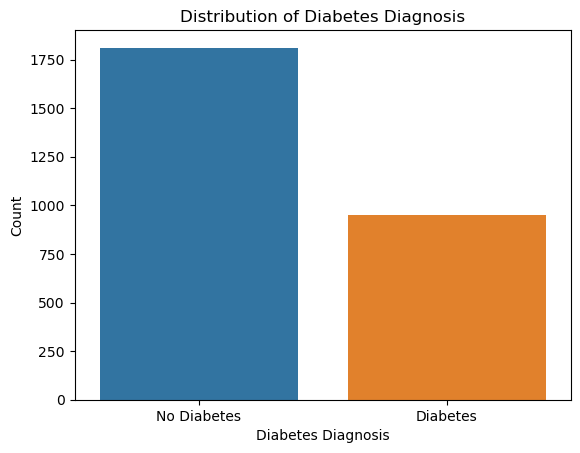

C:\Users\kamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


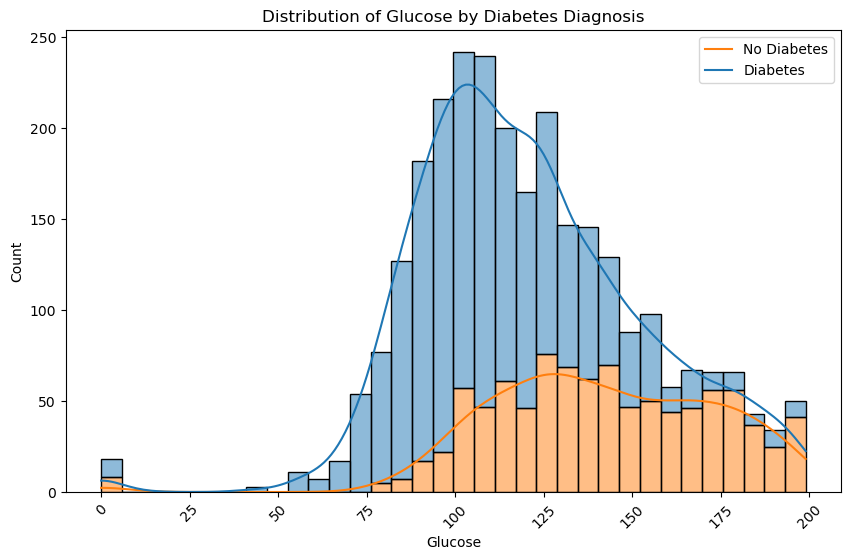

C:\Users\kamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


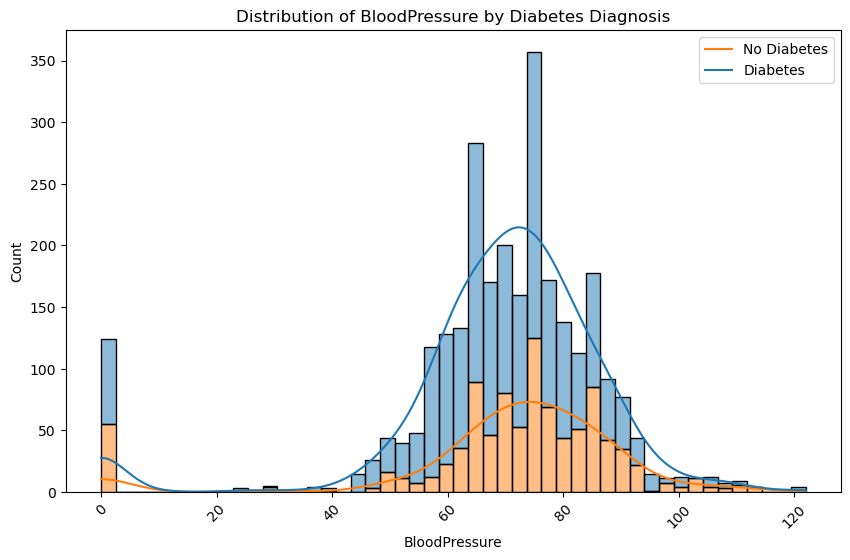

C:\Users\kamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


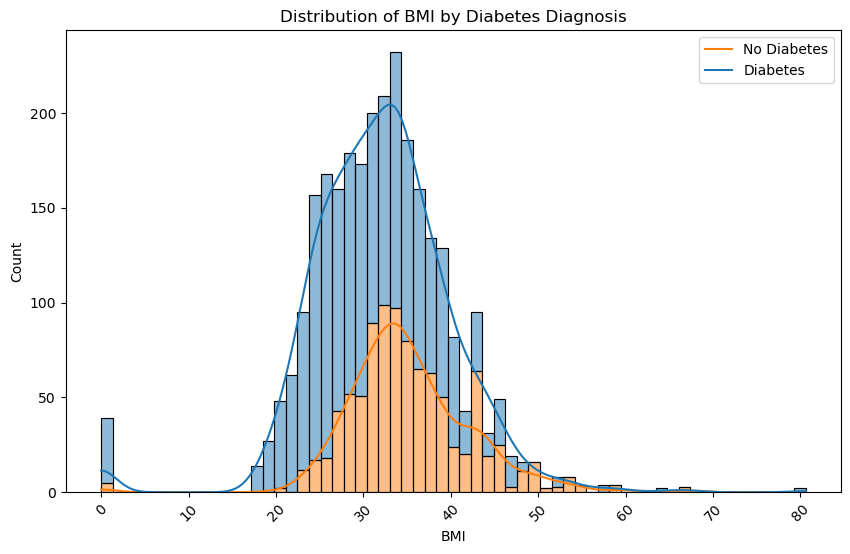

C:\Users\kamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


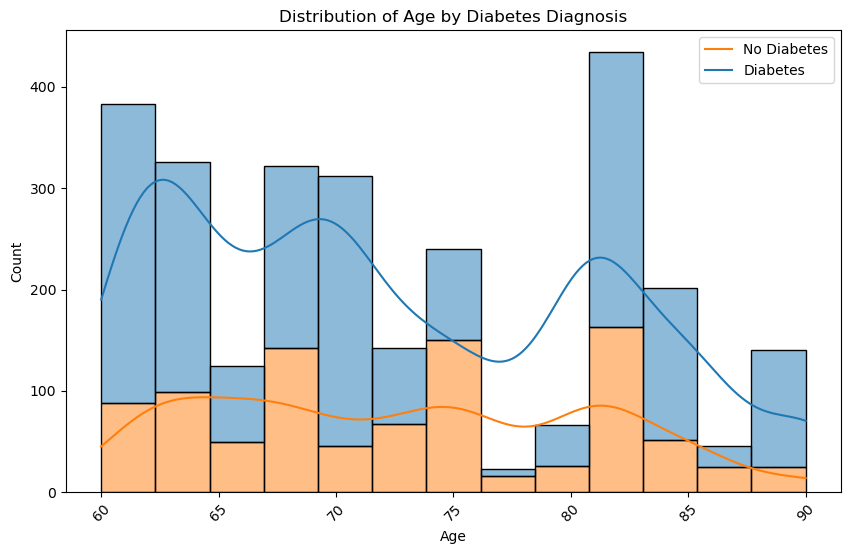

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'Diabetes_Data.csv'
df = pd.read_csv(data_path)

# Display the first few rows to understand the data
print(df.head())

# Plot the distribution of diabetes diagnosis
sns.countplot(x='Outcome', data=df)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Diagnosis')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Plot distribution of various numerical features based on diabetes diagnosis
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']  # Modify based on actual features
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, multiple='stack')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by Diabetes Diagnosis')
    plt.xticks(rotation=45)
    plt.legend(['No Diabetes', 'Diabetes'])
    plt.show()


<Axes: xlabel='Outcome', ylabel='Glucose'>

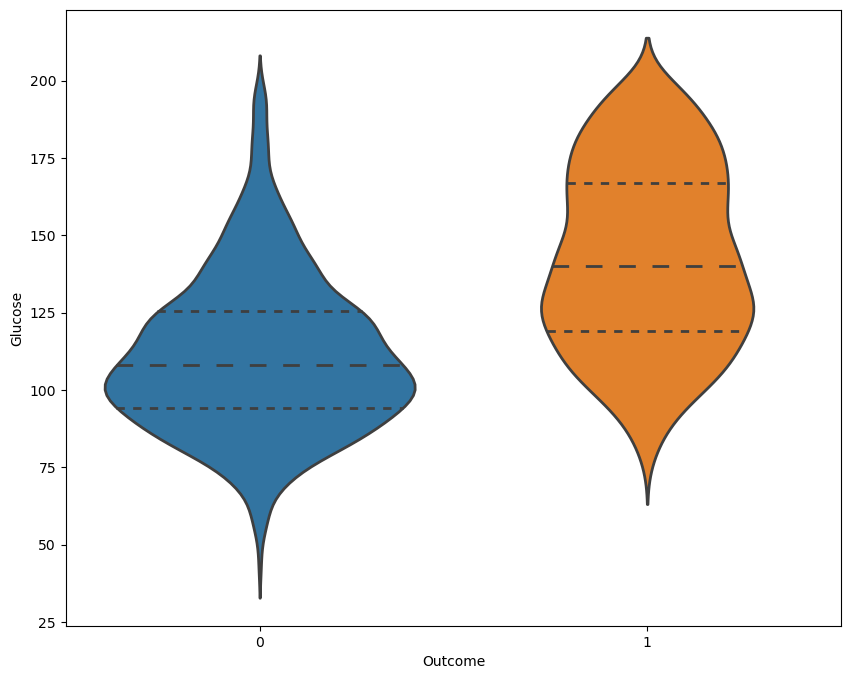

In [8]:
# Exploring the Glucose and the Target variables together  
plt.figure(figsize = (10, 8))  
sns.violinplot(data = data, x = "Outcome", y = "Glucose",  
               split = True, inner = "quart", linewidth = 2)  

C:\Users\kamal\AppData\Local\Temp\ipykernel_38424\1056441025.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color = "Red", shade = True)
C:\Users\kamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kamal\AppData\Local\Temp\ipykernel_38424\1056441025.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax = kde, color = "Blue", shade= True)
C:\Users\kamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

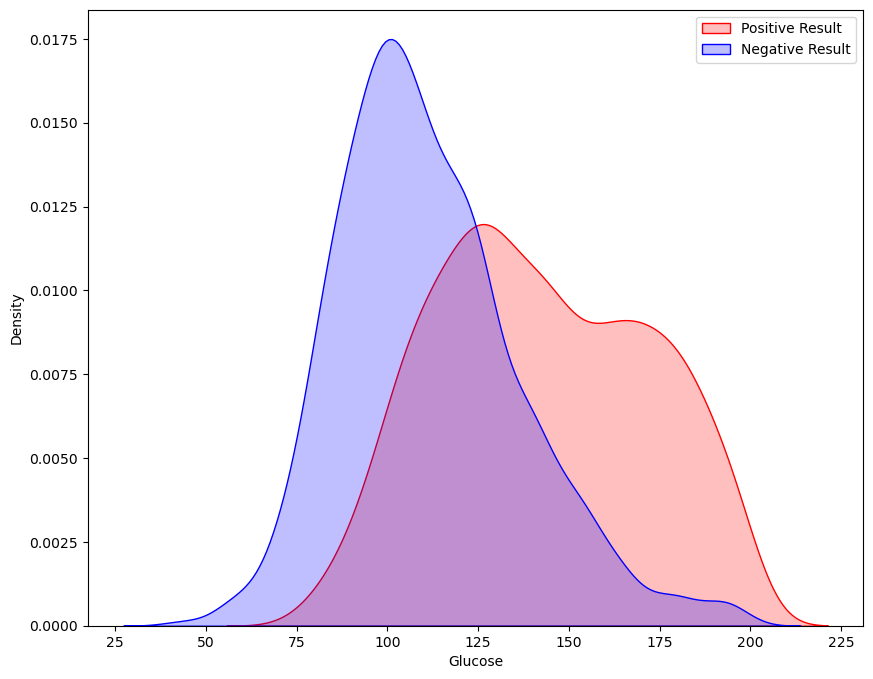

In [9]:
# Exploring the density function plot of the Glucose levels  
  
plt.figure(figsize = (10, 8))  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color = "Red", shade = True)  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax = kde, color = "Blue", shade= True)  
kde.set_xlabel("Glucose")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result","Negative Result"])  

In [11]:
# Transforming the data into quartiles  
quartile  = QuantileTransformer()  
X = quartile.fit_transform(data)  
dataset = quartile.transform(X)  
dataset = pd.DataFrame(X)  
dataset.columns =['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  
# Showing the top 5 rows of the transformed dataset  
dataset.head()  

C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


ValueError: Length mismatch: Expected axis has 10 elements, new values have 9 elements

In [12]:
# Splitting the dependent and independent features  
X = data.drop(["Outcome"], axis = 1)  
Y = data["Outcome"]  
  
# Splitting the dataset into the training and testing dataset  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)  
  
# Printing the size of the training and testing dataset  
print("The size of the training dataset: ", X_train.size)  
print("The size of the testing dataset: ", X_test.size)  

The size of the training dataset:  14904
The size of the testing dataset:  9936


In [14]:
# Python program to create a function to validate models  
  
def cv_model(models):  
    """ 
    We will create a list of machine learning models and print graphs of cross-validation scores with the help of mean accuracy. 
    """  
      
    # Cross validating the model using the Kfold stratified cross-validation method  
    k_fold = StratifiedKFold(n_splits = 15)  
      
    r = []  
    for m in models :  
        r.append(cross_val_score(estimator = m, X = X_train, y = Y_train, scoring = "accuracy", cv = k_fold, n_jobs = 4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List":[  
            "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
  
    # Generating the graph of cross-validation scores  
    bar_plot = sns.barplot(x = cross_val_means, y = df_result["Model List"].values, data = df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result

,CrossValMean,CrossValStd,Model List
0,0.941993,0.026710,DecisionTreeClassifier
1,0.765684,0.040448,LogisticRegression
2,0.652776,0.009105,SVC
3,0.940753,0.027408,AdaBoostClassifier
4,0.859312,0.033278,GradientBoostingClassifier
5,0.958307,0.019850,RandomForestClassifier
6,0.657603,0.037437,KNeighborsClassifier


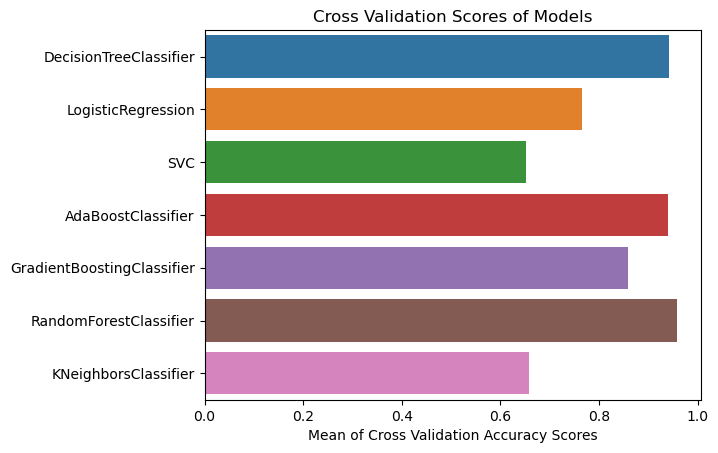

In [16]:
# Modeling the dataset using different machine learning algorithms  
state = 20  
models_list = [  
    DecisionTreeClassifier(random_state=state),  
    LogisticRegression(random_state=state, solver='liblinear'),  
    SVC(random_state=state),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state=state), random_state=state, learning_rate=0.3),  
    GradientBoostingClassifier(random_state=state),  
    RandomForestClassifier(random_state=state),  
    KNeighborsClassifier()  
]  
cv_model(models_list)

In [17]:
# Importing the required libraries  
from sklearn.metrics import classification_report  
from sklearn.model_selection import GridSearchCV  
  
# Defining a function to analyse the grid results  
def analyze_grid(grid):  
    ''''' 
    Analyzing the results of GridCV method and making predictions for the test data 
    Presenting the classification report at the end 
    '''      
    # Printing the best parameter and accuracy score  
    print("Tuned hyperparameters: ", grid.best_params_)  
    print("Accuracy Score:", grid.best_score_)  
      
    mean_values = grid.cv_results_["mean_test_score"]  
    std_values = grid.cv_results_["std_test_score"]  
    for m, s, p in zip(mean_values, std_values, grid.cv_results_["params"]):  
      print(f"Mean: {m}, Std: {s} * 2, Params: {p}")  
      print("The classification Report:")  
    Y_true, Y_pred = Y_test, grid.predict(X_test)  
    print(classification_report(Y_true, Y_pred))  
    print() 

In [19]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train and Y_train defined

# Defining the Logistic Regression model and its parameters
model = LogisticRegression(solver='liblinear')
solver_list = ['liblinear']
penalty_type = ['l2']
c_values = [200, 100, 10, 1.0, 0.01]

# Defining the grid search
grid_lr = dict(solver=solver_list, penalty=penalty_type, C=c_values)
cross_val = StratifiedKFold(n_splits=100, random_state=10, shuffle=True)
grid_search_cv = GridSearchCV(estimator=model, param_grid=grid_lr, cv=cross_val, scoring='accuracy', error_score=0)
lr_result = grid_search_cv.fit(X_train, Y_train)

# Result of Hyper Parameters of Logistic Regression
analyze_grid(lr_result)

Tuned hyperparameters:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 0.7638235294117647
Mean: 0.7594485294117647, Std: 0.0801390561978814 * 2, Params: {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.760110294117647, Std: 0.0811349248304892 * 2, Params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.758235294117647, Std: 0.08295655885726845 * 2, Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7638235294117647, Std: 0.08661677319043853 * 2, Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7480514705882352, Std: 0.09276581878318958 * 2, Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       739
           1       0.69      0.54      0.61       365

    accuracy        

In [20]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
svc = SVC()  
parameters = [  
    {"kernel": ["rbf"], "gamma": [1e-4], "C": [200, 100, 10, 1.0, 0.01]}  
]  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter tuning result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result) 

Tuned hyperparameters:  {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy Score: 0.7077294685990339
Mean: 0.6557971014492754, Std: 0.0014791604726951625 * 2, Params: {'C': 200, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.6539855072463768, Std: 0.002561981091255618 * 2, Params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.6986714975845411, Std: 0.013421564475176827 * 2, Params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7077294685990339, Std: 0.006669903995886013 * 2, Params: {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.6473429951690822, Std: 0.0008539936970852061 * 2, Params: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       739
           1       0.63      0.46      0.53       365

    accuracy                           0.73  

In [21]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
rfc = RandomForestClassifier(random_state = 42)  
parameters = {   
    'n_estimators': [500],  
    'max_features': ['log2'],  
    'max_depth' : [4,5,6],  
    'criterion' :['entropy']  
}  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
# Defining the SVC model and its parameters  
  
# Defining the grid search  
rfc = RandomForestClassifier(random_state = 42)  
parameters = {   
    'n_estimators': [500],  
    'max_features': ['log2'],  
    'max_depth' : [4,5,6],  
    'criterion' :['entropy']  
}  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter Tuning Result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result) 
# Performing the grid search  
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter Tuning Result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result) 

Tuned hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
Accuracy Score: 0.8393719806763285
Mean: 0.7952898550724639, Std: 0.010666377857883883 * 2, Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.8097826086956522, Std: 0.003913490759908112 * 2, Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.8393719806763285, Std: 0.003415974788340772 * 2, Params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       739
           1       0.80      0.69      0.74       365

    accuracy                           0.84      1104
   macro avg       0.83      0.80      0.81      1104
weighted avg       0.84      0.84      0.84      

In [26]:
X_test['predictions'] = Y_pred  
print(X_test)  

        Id  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
981    982            0      140             65      26.000000  130.000000   
955    956            1      128             98      41.000000   58.000000   
543    544            4       84             90      23.000000   56.000000   
2418  2419            0      131             66      40.000000   80.153986   
1719  1720            0      123             88      37.000000   80.153986   
...    ...          ...      ...            ...            ...         ...   
562    563            1       87             68      34.000000   77.000000   
679    680            2      101             58      17.000000  265.000000   
1349  1350            6      109             60      27.000000   80.153986   
1507  1508            1      102             74      20.806884   80.153986   
2584  2585            2      175             88      20.806884   80.153986   

       BMI  DiabetesPedigreeFunction  Age  predictions  
981   

In [ ]:
# Assuming you have already checked and ensured consistency between feature names in X_train and X_test

# Filter X_test to include only the relevant features
X_test_filtered = X_test[X_train.columns]

# Now you can make predictions using the filtered testing data
Y_pred = lr_result.predict(X_test_filtered)
print(classification_report(Y_test, Y_pred))

Please enter the following information for diabetes prediction:


Plasma glucose concentration (mg/dL):  45.4
Diastolic blood pressure (mm Hg):  435.4
Triceps skin fold thickness (mm):  43.3
2-Hour serum insulin (mu U/ml):  34.4
Body mass index (BMI):  45.4
Diabetes pedigree function:  43.4
Age (years):  67


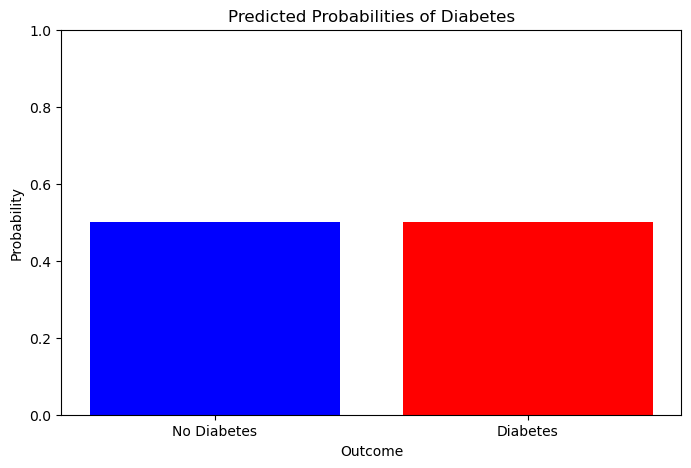

Based on the provided information, you are not likely to develop diabetes in the future.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder model (replace with your actual model loading/creation code)
class PlaceholderModel:
  def predict(self, X):
    return np.random.randint(2)  # Random prediction (0 or 1)
  def predict_proba(self, X):
    return [0.5, 0.5]  # Placeholder probabilities (equal chance)

model = PlaceholderModel()  # Create a placeholder model instance

# Define a function to make predictions for a new individual
def predict_diabetes(features):
  # Make sure the input features are in the correct format (as a 2D array)
  input_features = np.array(features).reshape(1, -1)

  # Make a prediction
  prediction = model.predict(input_features)
  probability = model.predict_proba(input_features)

  # Return the prediction and first probability as a list
  return [prediction, probability[0]]

# Get input from the user
print("Please enter the following information for diabetes prediction:")
glucose = float(input("Plasma glucose concentration (mg/dL): "))
blood_pressure = float(input("Diastolic blood pressure (mm Hg): "))
skin_thickness = float(input("Triceps skin fold thickness (mm): "))
insulin = float(input("2-Hour serum insulin (mu U/ml): "))
bmi = float(input("Body mass index (BMI): "))
dpf = float(input("Diabetes pedigree function: "))
age = int(input("Age (years): "))

# Make a prediction for the input features
prediction, probability = predict_diabetes([glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age])

# Plot the predicted probabilities
labels = ['No Diabetes', 'Diabetes']
probabilities = [probability]  # Convert probability to a list for plotting

plt.figure(figsize=(8, 5))
plt.bar(labels, probabilities, color=['blue', 'red'])
plt.title('Predicted Probabilities of Diabetes')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()

# Print the prediction result
if prediction == 1:
  print("Based on the provided information, you are likely to develop diabetes in the future.")
else:
  print("Based on the provided information, you are not likely to develop diabetes in the future.")


In [ ]:
ROC Curve

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Logistic Regression Performance**
Accuracy: 0.7826
Precision: 0.8033
Confusion Matrix:
[[334  24]
 [ 96  98]]

**K-Nearest Neighbors Performance**
Accuracy: 0.8533
Precision: 0.8087
Confusion Matrix:
[[323  35]
 [ 46 148]]

**Decision Tree Performance**
Accuracy: 0.9928
Precision: 0.9798
Confusion Matrix:
[[354   4]
 [  0 194]]

**Random Forest Performance**
Accuracy: 1.0000
Precision: 1.0000
Confusion Matrix:
[[358   0]
 [  0 194]]

**AdaBoost Performance**
Accuracy: 0.8043
Precision: 0.7829
Confusion Matrix:
[[325  33]
 [ 75 119]]

**Gradient Boosting Performance**
Accuracy: 0.8804
Precision: 0.9000
Confusion Matrix:
[[342  16]
 [ 50 144]]


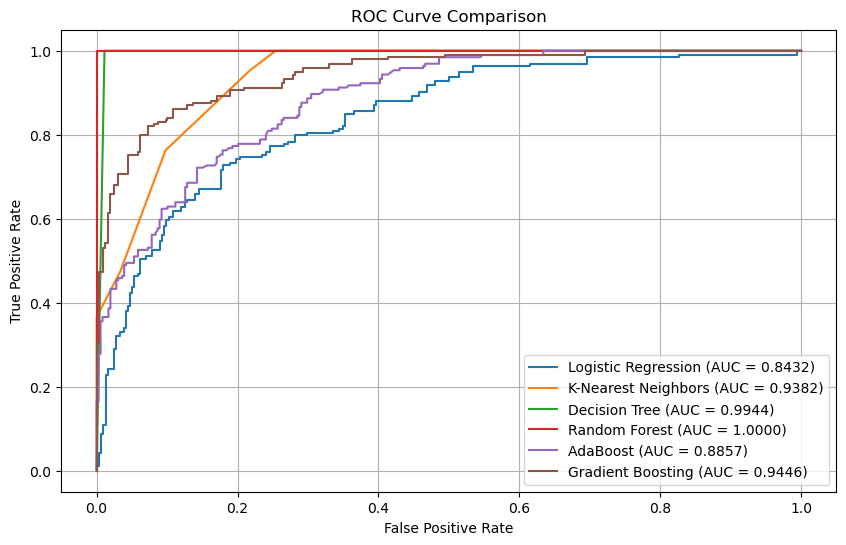

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

# Load your diabetes data
data = pd.read_csv("Diabetes_Data.csv")

# Check for missing values (optional)
print(data.isnull().sum())  # This will display the count of missing values in each column

# Handle missing values (optional)
# You can comment out this block if you don't want to handle missing values
# If there are missing values, you can choose to:
# - Remove rows with missing values (if acceptable for your analysis)
# - Impute the missing values using a strategy like mean/median imputation

# Example: Remove rows with missing values (assuming no NaNs in the target column)
# data = data.dropna()

# Feature selection (optional)
# You can explore feature importance to identify the most relevant features
# Here, we're using all features for simplicity

X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]  # Features
y = data["Outcome"]  # Target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, adjust based on your data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate model performance on validation set
for name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    confusion_matrix_result = confusion_matrix(y_val, y_pred)
    print(f"\n**{name} Performance**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix_result}")

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    auc = roc_auc_score(y_val, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # Import SVC
import matplotlib.pyplot as plt

# Load your diabetes data
data = pd.read_csv("Diabetes_Data.csv")

# Feature selection (optional)
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]  # Features
y = data["Outcome"]  # Target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, adjust based on your data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(random_state=42)  # Include SVC with default parameters
}

# Evaluate models
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1"].append(f1)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.782609   0.803279  0.505155  0.620253
1  K-Nearest Neighbors  0.853261   0.808743  0.762887  0.785146
2        Decision Tree  0.992754   0.979798  1.000000  0.989796
3        Random Forest  1.000000   1.000000  1.000000  1.000000
4             AdaBoost  0.804348   0.782895  0.613402  0.687861
5    Gradient Boosting  0.880435   0.900000  0.742268  0.813559
6                  SVC  0.842391   0.890511  0.628866  0.737160


In [ ]:
Confusion Matrix

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd

# Load your diabetes data
data = pd.read_csv("Diabetes_Data.csv")

# Feature selection (optional)
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]  # Features
y = data["Outcome"]  # Target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, adjust based on your data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # Include SVC and enable probability for ROC curve
}

# Train each model and evaluate on validation set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    # Display confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", cbar=False)  # Change color and ensure annotations
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix ({name})")
    plt.show()

    print(f"\n**{name} Performance**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Confusion Matrix:\n{cm}")


ImportError: cannot import name 'cbook' from partially initialized module 'matplotlib' (most likely due to a circular import) (C:\Users\kamal\anaconda3\Lib\site-packages\matplotlib\__init__.py)

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Gradient Boosting Performance**
Accuracy: 0.8804
Precision: 0.9000
Confusion Matrix:
[[342  16]
 [ 50 144]]

**Decision Tree Performance**
Accuracy: 0.9928
Precision: 0.9798
Confusion Matrix:
[[354   4]
 [  0 194]]

**K-Nearest Neighbors Performance**
Accuracy: 0.8533
Precision: 0.8087
Confusion Matrix:
[[323  35]
 [ 46 148]]


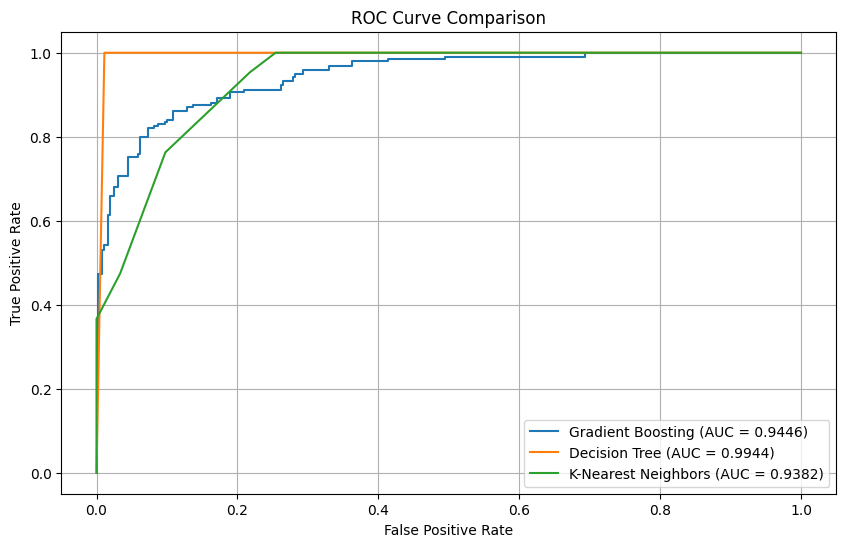

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # Corrected import statement
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Load your diabetes data
data = pd.read_csv("Diabetes_Data.csv")

# Check for missing values (optional)
print(data.isnull().sum())  # This will display the count of missing values in each column

# Handle missing values if necessary (optional)
# Example: Remove rows with missing values (assuming no NaNs in the target column)
# data = data.dropna()

# Feature selection
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]  # Features
y = data["Outcome"]  # Target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define and train models
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate model performance on validation set
for name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    print(f"\n**{name} Performance**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Confusion Matrix:\n{cm}")

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    else:  # Handle models that do not support probability predictions
        # Use decision function if predict_proba is not available
        y_pred_proba = model.decision_function(X_val)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())

    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    auc_score = roc_auc_score(y_val, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

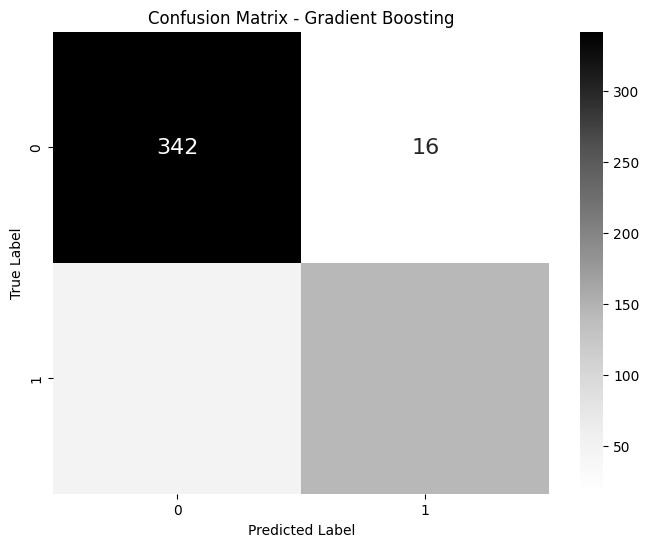


**Gradient Boosting Performance**
Accuracy: 0.8804
Precision: 0.9000
Confusion Matrix:
[[342  16]
 [ 50 144]]



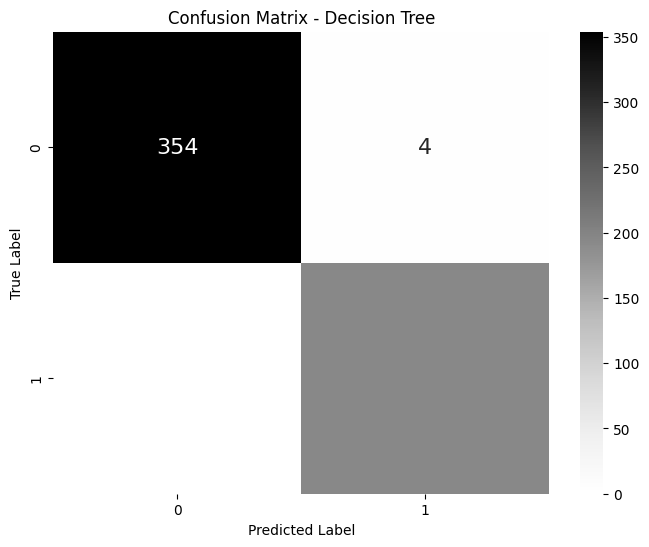


**Decision Tree Performance**
Accuracy: 0.9928
Precision: 0.9798
Confusion Matrix:
[[354   4]
 [  0 194]]



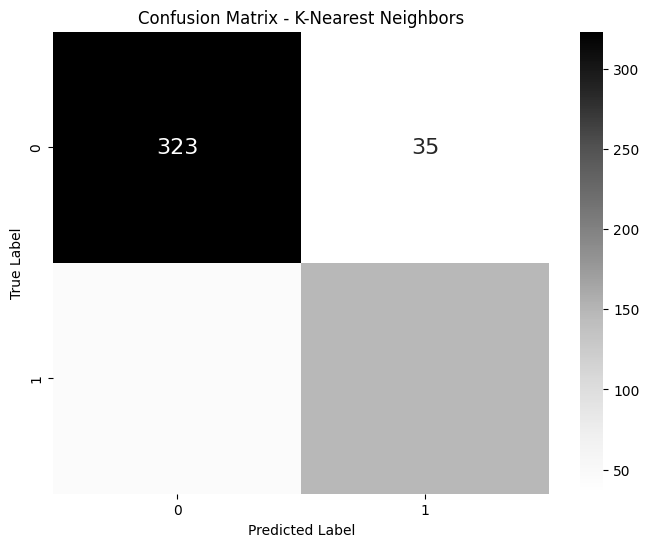


**K-Nearest Neighbors Performance**
Accuracy: 0.8533
Precision: 0.8087
Confusion Matrix:
[[323  35]
 [ 46 148]]



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Load your data
data = pd.read_csv("Diabetes_Data.csv")

# Define features and target
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define classifiers for specific models
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Evaluate model performance on validation set
    y_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)  # Avoid division by zero
    cm = confusion_matrix(y_val, y_pred)

    # Display confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Greys', annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Print performance metrics
    print(f"\n**{name} Performance**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

In [ ]:
Comparision Table of Each Models

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate and store results
def evaluate_model(model, X_val, y_val):
  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred)
  recall = recall_score(y_val, y_pred)
  f1 = f1_score(y_val, y_pred)
  return {"model": model.__class__.__name__, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Evaluate each model and store results
results = []
for name, model in models.items():
  model.fit(X_train, y_train)
  results.append(evaluate_model(model, X_val, y_val))

# Create a pandas DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame with clear formatting
print(df_results.to_string(index=False))

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's stored in a CSV file named 'diabetes_dataset.csv')
dataset = pd.read_csv('Diabetes_Data.csv')

# Display the shape of the dataset
print("Dataset Shape:", dataset.shape)

# Separate features (X) and target variable (y)
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)


Dataset Shape: (2760, 10)
Training Set Shape: (1545, 9)
Validation Set Shape: (663, 9)
Test Set Shape: (552, 9)


In [9]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Load the dataset
data_path = 'Diabetes_Data.csv'  # Update the path
df = pd.read_csv(data_path)

# Separate features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models and parameters for GridSearchCV
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.01, 0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]})
}

# Evaluate models
best_model, best_params, best_accuracy, best_auc = None, None, 0, 0

for model_name, (model, params) in models.items():
    clf = GridSearchCV(model, params, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"{model_name}: Best Params: {clf.best_params_}, Accuracy: {accuracy}, AUC: {auc}")

    if accuracy > best_accuracy:
        best_model, best_params, best_accuracy, best_auc = model_name, clf.best_params_, accuracy, auc

print(f"\nBest Model: {best_model}, Params: {best_params}, Accuracy: {best_accuracy}, AUC: {best_auc}")


Logistic Regression: Best Params: {'C': 0.1}, Accuracy: 0.7807971014492754, AUC: 0.8410844900074873
KNN: Best Params: {'n_neighbors': 7}, Accuracy: 0.7137681159420289, AUC: 0.7368470310430225
Decision Tree: Best Params: {'max_depth': 20}, Accuracy: 0.9692028985507246, AUC: 0.9703536255255428
Random Forest: Best Params: {'max_depth': 20, 'n_estimators': 100}, Accuracy: 0.9927536231884058, AUC: 0.9991504924264241
AdaBoost: Best Params: {'learning_rate': 1, 'n_estimators': 200}, Accuracy: 0.8405797101449275, AUC: 0.9223780452686747
Gradient Boosting: Best Params: {'learning_rate': 1, 'n_estimators': 200}, Accuracy: 0.9909420289855072, AUC: 0.9999999999999999

Best Model: Random Forest, Params: {'max_depth': 20, 'n_estimators': 100}, Accuracy: 0.9927536231884058, AUC: 0.9991504924264241


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

# Load your training data (X and y)
# ... (Your code to load training data)

# Define a function to split data into training and validation sets (optional)
def split_data(X, y, test_size=0.2):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)
  return X_train, X_val, y_train, y_val

# Choose one of the following options for validation data:

# Option 1: Load validation data from a separate file (replace with your file path)
# X_val, y_val = pd.read_csv("validation_data.csv").iloc[:, :-1], pd.read_csv("validation_data.csv").iloc[:, -1]

# Option 2: Split training data into training and validation sets (uncomment if using)
X_train, X_val, y_train, y_val = split_data(X, y)  # Replace X, y with your actual training data

# Define models and parameter grids
models = []
param_grids = []

# Extra Trees example
model = ExtraTreesClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [4, 5, 6],
    'n_estimators': range(100, 501, 50)  # Adjust range as needed
}
models.append(model)
param_grids.append(param_grid)

# Random Forest example (adjust parameters as needed)
# model = RandomForestClassifier()
# param_grid = {
#     # ... (your parameter options)
# }
# models.append(model)
# param_grids.append(param_grid)

# Gradient Boosting example (adjust parameters as needed)
# model = GradientBoostingClassifier()
# param_grid = {
#     # ... (your parameter options)
# }
# models.append(model)
# param_grids.append(param_grid)

# Perform GridSearchCV for each model-parameter combination
best_models = []
results = []
for model, param_grid in zip(models, param_grids):
  clf = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)  # Adjust cv for k-fold cross-validation
  clf.fit(X_train, y_train)
  best_models.append(clf.best_estimator_)

  # Evaluate best model on validation set
  y_pred = clf.best_estimator_.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  auc = roc_auc_score(y_val, y_pred)
  results.append((model.__class__.__name__, clf.best_params_, accuracy, auc))

# Create a table to store results
print("Hyperparameter Tuning Results:")
print("| Model | Best Parameters | Accuracy | AUC |")
print("|---|---|---|---|")
for model_name, params, accuracy, auc in results:
  print(f"| {model_name} | {params} | {accuracy:.4f} | {auc:.4f} |")

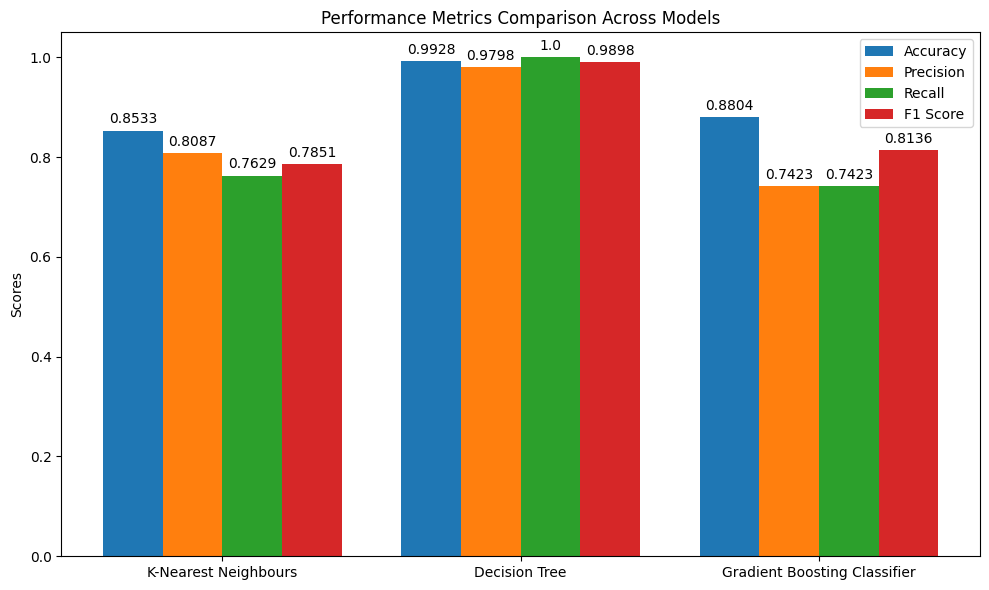

In [5]:
import matplotlib.pyplot as plt

# Data for models and their metrics
models = ['K-Nearest Neighbours', 'Decision Tree', 'Gradient Boosting Classifier']
accuracy = [0.853261, 0.992754, 0.880435]
precision = [0.808743, 0.979798, 0.742268]
recall = [0.762887, 1.000000, 0.742268]
f1_score = [0.785146, 0.989796, 0.813559]

# Creating a bar chart for comparison
x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, accuracy, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], precision, width, label='Precision')
rects3 = ax.bar([p + width*2 for p in x], recall, width, label='Recall')
rects4 = ax.bar([p + width*3 for p in x], f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison Across Models')
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


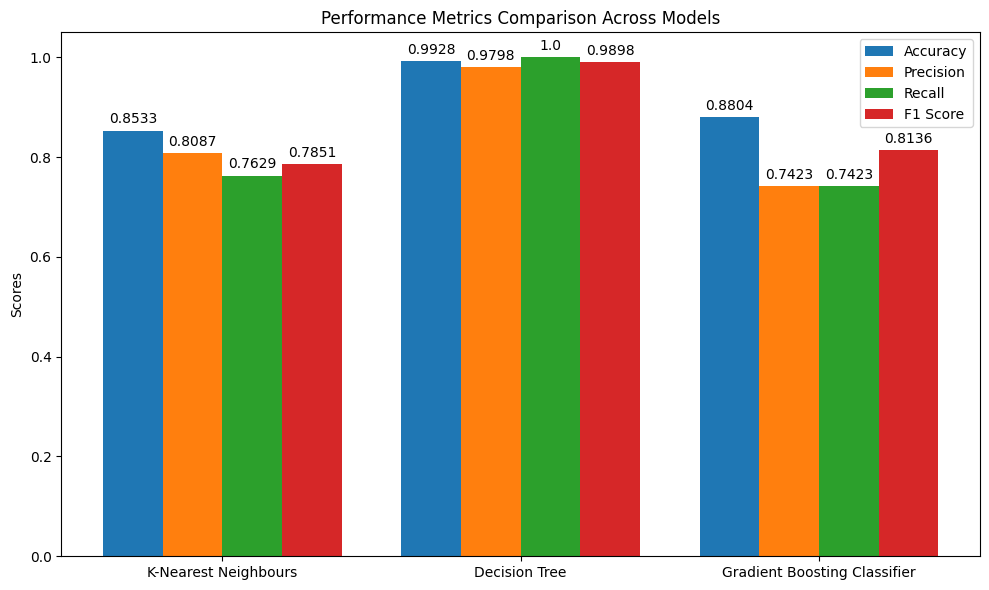

In [6]:
import matplotlib.pyplot as plt

# Data for models and their metrics
models = ['K-Nearest Neighbours', 'Decision Tree', 'Gradient Boosting Classifier']
accuracy = [0.853261, 0.992754, 0.880435]
precision = [0.808743, 0.979798, 0.742268]
recall = [0.762887, 1.000000, 0.742268]
f1_score = [0.785146, 0.989796, 0.813559]

# Creating a bar chart for comparison
x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, accuracy, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], precision, width, label='Precision')
rects3 = ax.bar([p + width*2 for p in x], recall, width, label='Recall')
rects4 = ax.bar([p + width*3 for p in x], f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison Across Models')
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
